# An√°lise Final La Msion Brasil

## Bibliotecas

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Define que o pandas n√£o deve limitar o n√∫mero de colunas exibidas
pd.set_option("display.max_columns", None)

# B√îNUS: Voc√™ tamb√©m pode fazer o mesmo para as linhas
pd.set_option("display.max_rows", None)

# B√îNUS: E aumentar a largura da exibi√ß√£o para evitar quebras de linha
pd.set_option("display.width", 1000)

## Carregando os dados

In [4]:
df_completo = pd.read_csv("Dados/df_completo_final.csv", sep=",")
df_completo.head(10)

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0               285             2023               13.0               -9.0
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0               298             2023               88.0                0.0
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0               295             2023               58.0                0.0
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0               363             2023               46.0              -81.0
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0               357             2023               41.0              -58.0
5  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       6.0               670             2023              128.0              -11.0
6  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       7.0               258             2023              228.0               -7.0
7  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       8.0               211             2023                1.0             -243.0
8  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       9.0               338             2023                1.0             -122.0
9  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023      10.0               544             2023                9.0              -69.0

In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome Atleta        3880 non-null   object 
 1   sexo               3880 non-null   object 
 2   faixa_etaria       3880 non-null   object 
 3   peso               3880 non-null   object 
 4   ano                3880 non-null   int64  
 5   km_prova           3880 non-null   float64
 6   tempo_por_km_seg   3880 non-null   int64  
 7   ano_mais_antigo    3880 non-null   int64  
 8   desnivel_positivo  3880 non-null   float64
 9   desnivel_negativo  3880 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 303.3+ KB


In [4]:
df_completo.describe()

ano     km_prova  tempo_por_km_seg  ano_mais_antigo  \
count  3880.000000  3880.000000       3880.000000      3880.000000   
mean   2022.519588    18.302835        711.316237      2022.519588   
std       0.499681    10.281036        502.194156         0.499681   
min    2022.000000     1.000000         23.000000      2022.000000   
25%    2022.000000     9.000000        401.000000      2022.000000   
50%    2023.000000    18.000000        558.000000      2023.000000   
75%    2023.000000    27.000000        834.000000      2023.000000   
max    2023.000000    36.000000       4463.000000      2023.000000   

       desnivel_positivo  desnivel_negativo  
count        3880.000000        3880.000000  
mean           78.211598         -78.093814  
std            93.670162          85.562874  
min             0.000000        -329.000000  
25%             6.000000        -137.000000  
50%            44.000000         -42.000000  
75%           143.000000         -11.000000  
max           354.000000           0.000000

## An√°lise Explorat√≥ria dos dados

Vamos come√ßar analisando o desempenho geral dos atletas. Para isso devemos trasnformar nosso dataframe onde cada linha √© um km do atleta, para um novo onde cada linha dever uma √∫nica observa√ß√£o do atleta e as vari√°veis v√£o ser um resumo.

In [5]:
df_agregado_por_atleta = (
    df_completo.groupby("Nome Atleta")
    .agg(
        # Pega a informa√ß√£o demogr√°fica (que √© a mesma em todas as linhas do atleta)
        sexo=("sexo", "first"),
        faixa_etaria=("faixa_etaria", "first"),
        peso=("peso", "first"),
        ano_corrida=("ano", "first"),  # Pega o ano da corrida
        # Calcula as m√©tricas de desempenho e estrat√©gia
        Tempo_Final_seg=("tempo_por_km_seg", "sum"),
        Ritmo_Medio_seg=("tempo_por_km_seg", "mean"),
        Variabilidade_Ritmo_std=(
            "tempo_por_km_seg",
            "std",
        ),  # Desvio padr√£o do ritmo por km
        # Calcula as m√©tricas de esfor√ßo relacionadas ao percurso
        Total_Desnivel_Positivo=("desnivel_positivo", "sum"),
        Total_Desnivel_negativo=("desnivel_negativo", "sum"),
    )
    .reset_index()
)

# Para facilitar a interpreta√ß√£o, vamos converter segundos para minutos
df_agregado_por_atleta["Tempo_Final_min"] = (
    df_agregado_por_atleta["Tempo_Final_seg"] / 60
)
df_agregado_por_atleta["Ritmo_Medio_min"] = (
    df_agregado_por_atleta["Ritmo_Medio_seg"] / 60
)
df_agregado_por_atleta["Variabilidade_Ritmo_min_std"] = (
    df_agregado_por_atleta["Variabilidade_Ritmo_std"] / 60
)

# Vamos ver como ficou
df_agregado_por_atleta.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023   
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022   
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022   

   Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  \
0            21774       604.833333               290.291331   
1            31986       888.500000               417.596832   
2            33826       939.611111               669.719569   
3            18496       513.777778               261.647539   
4            14626       417.885714               195.390826   

   Total_Desnivel_Positivo  Total_Desnivel_negativo  Tempo_Final_min  \
0                   2787.0                  -2790.0       362.900000   
1                   2787.0                  -2790.0       533.100000   
2                   2787.0                  -2790.0       563.766667   
3                   2787.0                  -2790.0       308.266667   
4                   2779.0                  -2781.0       243.766667   

   Ritmo_Medio_min  Variabilidade_Ritmo_min_std  
0        10.080556                     4.838189  
1        14.808333                     6.959947  
2        15.660185                    11.161993  
3         8.562963                     4.360792  
4         6.964762                     3.256514

### An√°lises gr√°ficas

#### Dstribui√ß√£o do tempo final

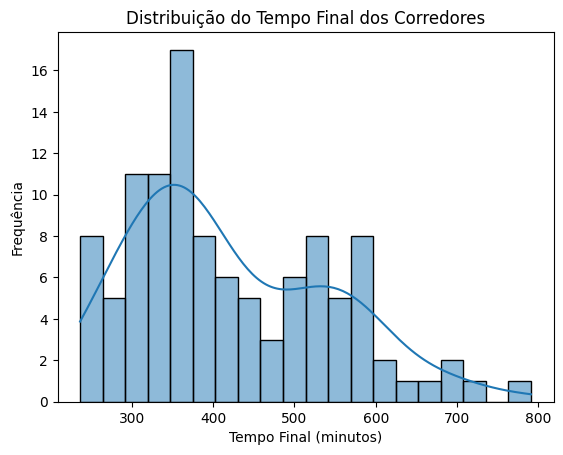

count    109.000000
mean     422.004128
std      122.970025
min      236.400000
25%      329.000000
50%      389.816667
75%      525.333333
max      790.933333
Name: Tempo_Final_min, dtype: float64


In [6]:
sns.histplot(data=df_agregado_por_atleta, x="Tempo_Final_min", bins=20, kde=True)
plt.title("Distribui√ß√£o do Tempo Final dos Corredores")
plt.xlabel("Tempo Final (minutos)")
plt.ylabel("Frequ√™ncia")
plt.show()

# Tamb√©m √© √∫til ver as estat√≠sticas descritivas
print(df_agregado_por_atleta["Tempo_Final_min"].describe())

#### An√°lise do Sexo

In [7]:
df_agregado_por_atleta["sexo"].value_counts()

sexo
Homens      78
Mulheres    31
Name: count, dtype: int64

- Aqui podemos observar a que a quantidade de participantes homens √© maior que a participa√ß√£o de mulheres.

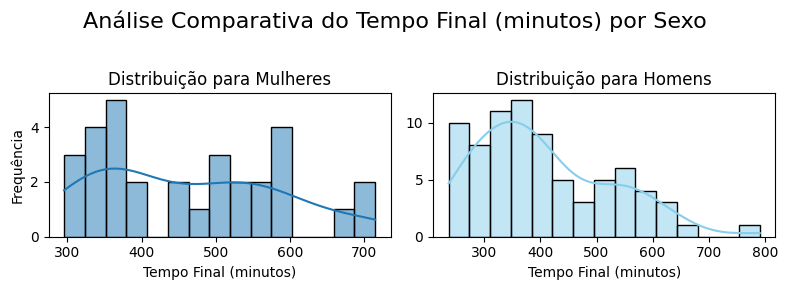

--- Estat√≠sticas Descritivas Comparativas ---
       Mulheres  Homens
count     31.00   78.00
mean     463.71  405.43
std      123.35  119.60
min      295.48  236.40
25%      358.56  314.38
50%      444.42  374.14
75%      557.38  497.77
max      714.43  790.93


In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# T√≠tulo principal para a figura inteira
fig.suptitle("An√°lise Comparativa do Tempo Final (minutos) por Sexo", fontsize=16)


# 2. Plote o histograma das Mulheres no primeiro eixo (axes[0])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    ax=axes[0],
)  # A chave √© especificar o eixo aqui!
axes[0].set_title("Distribui√ß√£o para Mulheres")
axes[0].set_xlabel("Tempo Final (minutos)")
axes[0].set_ylabel("Frequ√™ncia")


# 3. Plote o histograma dos Homens no segundo eixo (axes[1])
sns.histplot(
    data=df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"],
    x="Tempo_Final_min",
    bins=15,
    kde=True,
    color="skyblue",  # Mudar a cor ajuda na diferencia√ß√£o
    ax=axes[1],
)  # E aqui tamb√©m!
axes[1].set_title("Distribui√ß√£o para Homens")
axes[1].set_xlabel("Tempo Final (minutos)")
axes[1].set_ylabel("")  # Pode remover o label do eixo Y para um visual mais limpo


# 4. Exiba os gr√°ficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()


# ======================================================================
# PARTE 2: ESTAT√çSTICAS (.DESCRIBE()) LADO A LADO
# ======================================================================

# 1. Calcule o describe() para cada grupo separadamente
desc_mulheres = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Mulheres"][
    "Tempo_Final_min"
].describe()
desc_homens = df_agregado_por_atleta[df_agregado_por_atleta["sexo"] == "Homens"][
    "Tempo_Final_min"
].describe()


# 2. Use pd.concat para unir as duas sa√≠das como colunas de um novo DataFrame
# axis=1 indica que a concatena√ß√£o deve ser feita pelas colunas (lado a lado).
# keys=[] define os nomes das novas colunas.
estatisticas_comparativas = pd.concat(
    [desc_mulheres, desc_homens], axis=1, keys=["Mulheres", "Homens"]
)


# 3. Imprima a tabela comparativa final
print("--- Estat√≠sticas Descritivas Comparativas ---")
print(
    estatisticas_comparativas.round(2)
)  # .round(2) para formatar com 2 casas decimais


In [9]:
estatisticas_describe = ["count", "mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_agregado_por_atleta.groupby("sexo")
    .agg(
        {
            "Tempo_Final_min": estatisticas_describe,
            "Ritmo_Medio_min": estatisticas_describe,
            "Variabilidade_Ritmo_min_std": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Sexo ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Sexo ---
                                      count    mean     std     min  median  \
sexo                                                                          
Homens   Ritmo_Medio_min                 78   11.37    3.37    6.57   10.39   
         Tempo_Final_min                 78  405.43  119.60  236.40  374.14   
         Variabilidade_Ritmo_min_std     78    6.63    3.08    2.90    5.13   
Mulheres Ritmo_Medio_min                 31   13.11    3.56    8.21   12.49   
         Tempo_Final_min                 31  463.71  123.35  295.48  444.42   
         Variabilidade_Ritmo_min_std     31    7.99    3.56    3.90    7.16   

                                         max  
sexo                                          
Homens   Ritmo_Medio_min               22.60  
         Tempo_Final_min              790.93  
         Variabilidade_Ritmo_min_std   16.40  
Mulheres Ritmo_Medio_min               20.41  
         Tempo_Final_min              

C:\Users\Home\AppData\Local\Temp\ipykernel_22284\3671722932.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


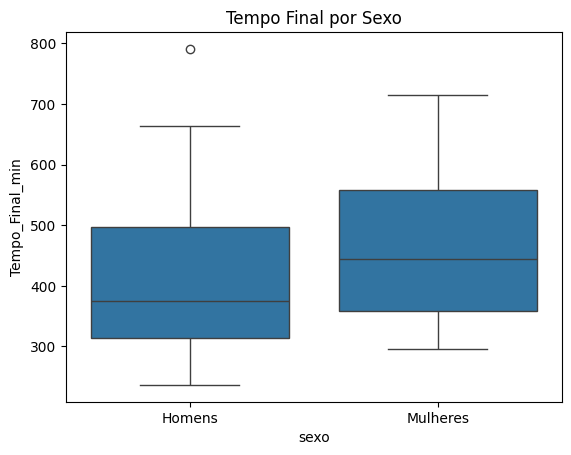

In [10]:
# Sexo vs. Tempo Final
sns.boxplot(data=df_agregado_por_atleta, x="sexo", y="Tempo_Final_min")
plt.title("Tempo Final por Sexo")
plt.show()


1. Tempo Final da Prova (Tempo_Final_min)

Desempenho M√©dio: Os homens terminaram a prova, em m√©dia, cerca de 1 hora mais r√°pido que as mulheres (mean de 406 min para homens vs. 465 min para mulheres). A mediana (o valor do meio) confirma essa tend√™ncia, mostrando que o corredor "mediano" masculino tamb√©m foi consideravelmente mais r√°pido.

Dispers√£o: A dispers√£o dos tempos √© alta e relativamente parecida para ambos os grupos (std de 119 min para homens e 124 min para mulheres). Isso indica que, em ambos os sexos, havia uma grande variedade de n√≠veis de habilidade, desde os corredores mais r√°pidos at√© os que levaram mais tempo. Podendo existir n√≠veis entre os corredores, indo de corredores mais experientes e profissionais ate corredores amadores e menos experientes.

2. Ritmo M√©dio (Ritmo_Medio_min)

Velocidade M√©dia: Confirmando o dado anterior, o ritmo m√©dio dos homens foi mais baixo (mais r√°pido), com uma m√©dia de 11.36 min/km contra 13.07 min/km das mulheres.

Melhores e Piores Ritmos: O homem mais r√°pido teve um ritmo de 6.57 min/km, enquanto a mulher mais r√°pida teve um ritmo de 8.21 min/km. Ambos os grupos tiveram atletas com ritmos bem mais lentos (22.60 e 20.41 min/km), o que √© comum em corridas de montanha devido √† dificuldade do percurso.

3. Variabilidade do Ritmo (Variabilidade_Ritmo_min_std)

Consist√™ncia da Prova: Esta √© talvez a m√©trica mais interessante. Em m√©dia, os homens tiveram uma menor variabilidade de ritmo (mean de 6.63) em compara√ß√£o com as mulheres (mean de 7.98).

#### An√°lise por Faixa et√°ria

In [11]:
df_agregado_por_atleta["faixa_etaria"].value_counts() / len(df_agregado_por_atleta)

faixa_etaria
35 a 44    0.412844
25 a 34    0.311927
45 a 54    0.183486
20 a 24    0.055046
55 a 64    0.036697
Name: count, dtype: float64

- Aqui podemos notar uma grande concetra√ß√£o em corredores de 35 a 44 anos, seguindo de corredores mais jovens de 25 a 34 anos. Temos um acumo de 90% dos participantes indo de 25 a 55 anos.

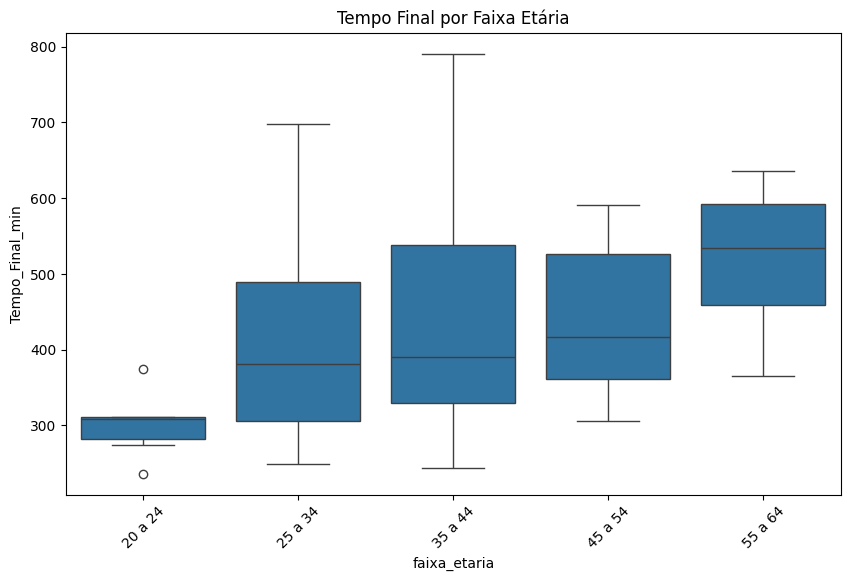

In [12]:
# Faixa Et√°ria vs. Tempo Final
plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura para caber as labels
# Remove None values before sorting to avoid TypeError
faixa_etaria_order = sorted(
    [x for x in df_agregado_por_atleta["faixa_etaria"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta,
    x="faixa_etaria",
    y="Tempo_Final_min",
    order=faixa_etaria_order,
)
plt.title("Tempo Final por Faixa Et√°ria")
plt.xticks(rotation=45)  # Rotaciona as labels do eixo x para n√£o sobrepor
plt.show()

- Tend√™ncia Geral: O gr√°fico evidencia uma tend√™ncia geral de aumento do tempo mediano de conclus√£o da prova com o avan√ßo da idade. Contudo, essa rela√ß√£o n√£o se mostra perfeitamente linear.

- Melhor Desempenho: A faixa et√°ria de 20 a 24 anos se destaca com o menor tempo mediano e a menor dispers√£o (caixa mais compacta). Isso sugere que este grupo n√£o s√≥ foi o mais r√°pido, em m√©dia, mas tamb√©m o mais homog√™neo em termos de performance.

- Maior Variabilidade: O grupo de 35 a 44 anos apresenta a maior amplitude interquartil (a "altura" da caixa), indicando a maior variabilidade nos tempos de conclus√£o. Isso pode sugerir que esta faixa cont√©m uma mistura mais heterog√™nea de atletas, desde os muito experientes at√© os iniciantes.

- Ponto de Inflex√£o: Nota-se um ponto de interesse na faixa de 45 a 54 anos, que apresenta um tempo mediano ligeiramente inferior ao do grupo anterior (35 a 44 anos). Isso quebra a tend√™ncia de queda de performance e pode ser um ponto a ser investigado futuramente.

- Outlier: √â importante destacar a presen√ßa de um outlier no grupo de 20 a 24 anos, indicando um atleta com um tempo de prova atipicamente superior ao de seus pares na mesma faixa et√°ria.

#### An√°lise por faixa de peso

In [13]:
df_agregado_por_atleta["peso"].value_counts()

peso
65 a 74 kg        34
75 a 84 kg        25
55 a 64 kg        21
54 kg e abaixo    12
N√£o informado      8
85 a 94 kg         7
95 kg a 104 kg     2
Name: count, dtype: int64

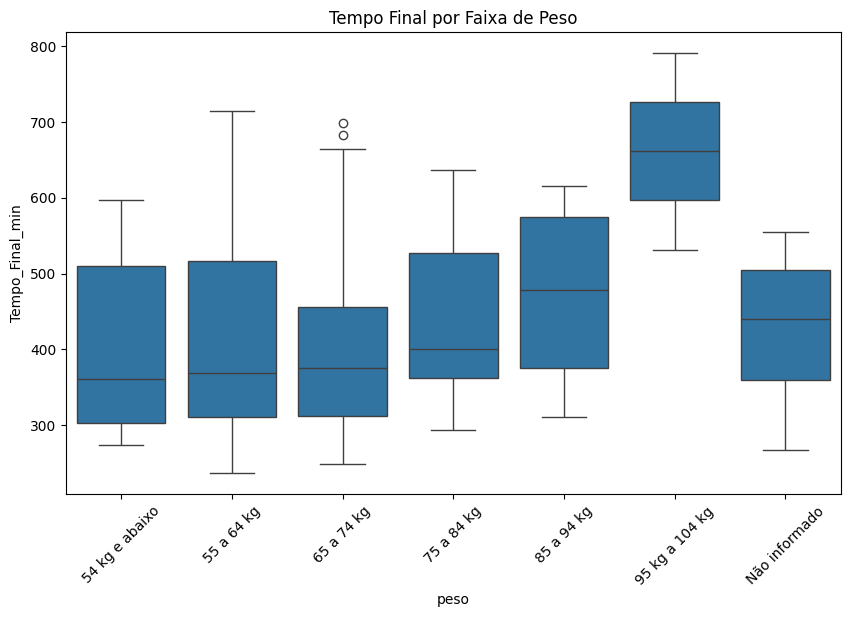

In [14]:
# Peso vs. Tempo Final
plt.figure(figsize=(10, 6))
# Remove None values before sorting to avoid TypeError
peso_order = sorted(
    [x for x in df_agregado_por_atleta["peso"].unique() if x is not None]
)
sns.boxplot(
    data=df_agregado_por_atleta, x="peso", y="Tempo_Final_min", order=peso_order
)
plt.title("Tempo Final por Faixa de Peso")
plt.xticks(rotation=45)
plt.show()

- Tend√™ncia Principal: Fica clara a correla√ß√£o entre o aumento da faixa de peso e o aumento no tempo mediano de prova. Atletas mais leves tenderam a ser mais r√°pidos.

- Desempenho nos Extremos: O grupo de 54 kg e abaixo obteve os melhores tempos, enquanto a faixa de 95 a 104 kg registrou o desempenho m√©dio mais lento.

- Variabilidade: As faixas de peso intermedi√°rias (55 a 74 kg) mostram a maior dispers√£o nos resultado, indicando uma grande varia√ß√£o de performance nesses grupos.

- Dados n√£o informados: O grupo "N√£o informado" apresenta um desempenho mediano, posicionando-se de forma similar √†s categorias de peso intermedi√°rias.

#### An√°lise da Variabilidade de Ritmo

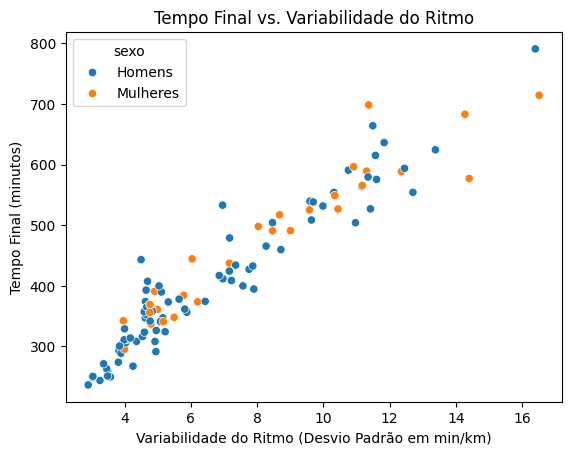

In [15]:
sns.scatterplot(
    data=df_agregado_por_atleta,
    x="Variabilidade_Ritmo_min_std",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Variabilidade do Ritmo")
plt.xlabel("Variabilidade do Ritmo (Desvio Padr√£o em min/km)")
plt.ylabel("Tempo Final (minutos)")
plt.show()

- Correla√ß√£o Positiva Evidente: O gr√°fico mostra uma clara e forte correla√ß√£o positiva entre as duas vari√°veis. Isso significa que, √† medida que a variabilidade do ritmo aumenta (eixo X), o tempo final da prova tamb√©m tende a aumentar (eixo Y).

- Interpreta√ß√£o Pr√°tica: Em termos simples, os atletas que mantiveram um ritmo mais constante e com menos oscila√ß√µes foram, em geral, os que terminaram a prova mais r√°pido. A consist√™ncia no ritmo parece ser um indicador chave para um bom desempenho.

- Comparativo entre Sexos: Ambos os grupos, homens e mulheres, seguem a mesma tend√™ncia linear. N√£o h√° uma separa√ß√£o clara dos grupos, indicando que essa rela√ß√£o entre consist√™ncia e performance √© v√°lida para ambos. No entanto, √© poss√≠vel notar que os pontos com o melhor desempenho combinado (canto inferior esquerdo, com baixo tempo e baixa variabilidade) s√£o, em sua maioria, de atletas masculinos.

- Conclus√£o: A consist√™ncia do ritmo √© um fator crucial para o desempenho nesta prova. Atletas menos eficientes em manter um passo est√°vel, provavelmente devido ao terreno ou √† estrat√©gia, acabaram com tempos de conclus√£o significativamente mais altos.

#### An√°lise Metade da Prova

Vamos analisar o tempo m√©dio entre primeira metade e segunda metade da prova.

- (Split Positivo): Significa que o ritmo na segunda metade foi mais alto (mais lento)
- (Split Negativo): Seria o caso de um atleta que correu a segunda metade mais r√°pido que a primeira.

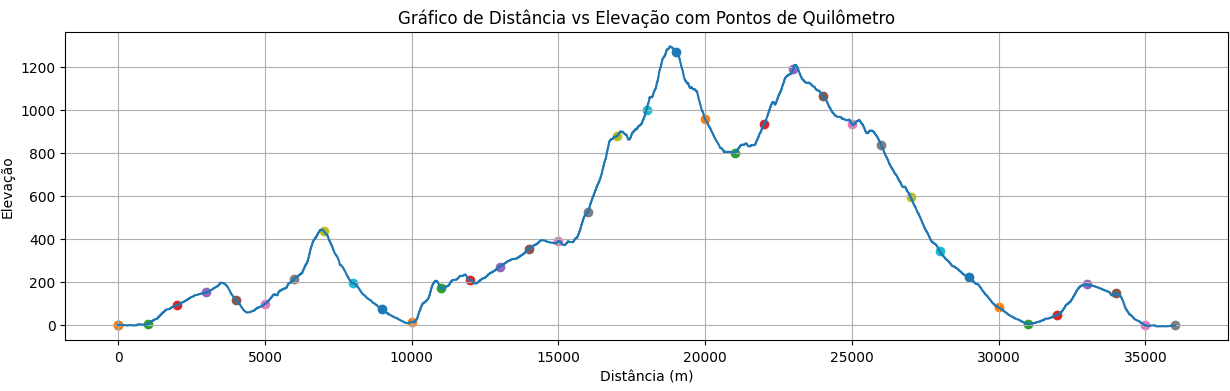

In [16]:
df_metade = df_completo.copy()
df_metade["Metade_Prova"] = "Primeira Metade"
df_metade.loc[df_metade["km_prova"] > 18.0, "Metade_Prova"] = "Segunda Metade"
df_metade.head(5)

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   

      Metade_Prova  
0  Primeira Metade  
1  Primeira Metade  
2  Primeira Metade  
3  Primeira Metade  
4  Primeira Metade

In [ ]:
df_kms = (
    df_metade[["km_prova", "desnivel_positivo", "desnivel_negativo", "Metade_Prova"]]
    .drop_duplicates()
    .reset_index(drop=True)
)
df_kms.head()

km_prova  desnivel_positivo  desnivel_negativo     Metade_Prova
0       1.0               13.0               -9.0  Primeira Metade
1       2.0               88.0                0.0  Primeira Metade
2       3.0               58.0                0.0  Primeira Metade
3       4.0               46.0              -81.0  Primeira Metade
4       5.0               41.0              -58.0  Primeira Metade

In [ ]:
estatisticas_describe = ["sum", "mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_kms.groupby("Metade_Prova")
    .agg(
        {
            "desnivel_positivo": estatisticas_describe,
            "desnivel_negativo": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Parte da Prova ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Parte da Prova ---
                                      sum    mean    std    min  median    max
Metade_Prova                                                                  
Primeira Metade desnivel_negativo  -767.0  -42.61  60.04 -243.0   -22.0    0.0
                desnivel_positivo  1768.0   98.22  92.83    1.0    73.5  354.0
Segunda Metade  desnivel_negativo -2023.0 -112.39  96.21 -329.0  -129.0   -1.0
                desnivel_positivo  1019.0   56.61  94.61    0.0     9.5  299.0


C:\Users\Home\AppData\Local\Temp\ipykernel_22284\1306683736.py:12: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


Primeira Metade: A Fase de "Conquista"
Ganho de Eleva√ß√£o Total (sum): Voc√™ sobe 1768 metros.

Perfil Predominante: √â majoritariamente subida. O ganho de eleva√ß√£o (+1768m) √© mais que o dobro da perda (-767m).

Dificuldade M√©dia (mean/median): Um quil√¥metro t√≠pico tem uma subida brutal. A m√©dia de ganho √© de 98.2m por km, e a mediana √© de 73.5m, indicando subidas constantes e √≠ngremes.

Pico de Dificuldade (max): Existe pelo menos um quil√¥metro com 354 metros de subida, uma verdadeira "parede".

Segunda Metade: A Fase de "Descida e Velocidade"
Perda de Eleva√ß√£o Total (sum): Voc√™ desce -2023 metros.

Perfil Predominante: √â majoritariamente descida. A perda de eleva√ß√£o (-2023m) √© o dobro do ganho (+1019m).

Dificuldade M√©dia (mean/median): Um quil√¥metro t√≠pico √© quase plano. A mediana de ganho de apenas 9.5m revela que a maioria dos quil√¥metros tem pouca ou nenhuma subida, permitindo um ritmo muito mais r√°pido.

Pico de Dificuldade (max): Ainda existem subidas duras (m√°ximo de 299m), mas s√£o mais pontuais e menos frequentes que na primeira metade.

Resumo Comparativo Final
Balan√ßo (Subida vs. Descida):

Primeira Metade: Saldo positivo de +1001 metros (muito mais sobe do que desce).

Segunda Metade: Saldo negativo de -1004 metros (muito mais desce do que sobe).

Esses n√∫meros provam que a estrat√©gia correta √© ser extremamente conservador no in√≠cio, pois a maior parte do esfor√ßo de subida est√° concentrada na primeira metade, enquanto a segunda metade oferece um terreno muito mais favor√°vel para correr.

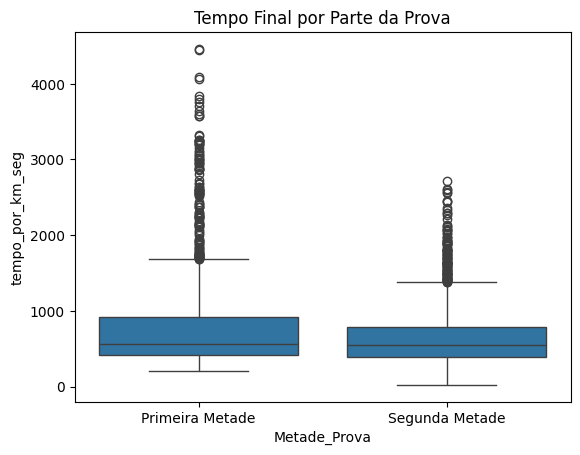

In [19]:
sns.boxplot(data=df_metade, x="Metade_Prova", y="tempo_por_km_seg")
plt.title("Tempo Final por Parte da Prova")
plt.show()

In [ ]:
estatisticas_describe = ["mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_metade.groupby("Metade_Prova")
    .agg({"tempo_por_km_seg": estatisticas_describe})
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Parte da Prova ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Parte da Prova ---
                                    mean     std  min  median   max
Metade_Prova                                                       
Primeira Metade tempo_por_km_seg  773.61  591.85  200   565.0  4463
Segunda Metade  tempo_por_km_seg  647.59  379.41   23   546.5  2722


C:\Users\Home\AppData\Local\Temp\ipykernel_22284\3010911590.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


- Primeira Metade (Com mais subidas):

Ritmo mais lento e variado: A grande quantidade de subidas for√ßa os atletas a desacelerar, o que explica os tempos mais altos e a maior varia√ß√£o de performance.

Quil√¥metros mais dif√≠ceis: Os tempos extremamente lentos (outliers) confirmam que as subidas mais brutais est√£o nesta parte.

- Segunda Metade (Com menos subidas):

Ritmo mais r√°pido e consistente: Com um terreno mais favor√°vel, os atletas conseguem impor um ritmo mais forte e constante.

Prova de perfil assim√©trico: O gr√°fico n√£o mostra que os atletas est√£o menos cansados, mas sim que a maior dificuldade da prova est√° concentrada no in√≠cio.

In [21]:
ritmo_por_metade = df_metade.groupby(["Nome Atleta", "Metade_Prova"]).agg(
    tempo_por_km_seg=("tempo_por_km_seg", "mean"),
    tempo_total=("tempo_por_km_seg", "sum"),
)
comparativo_splits = ritmo_por_metade.unstack()
multi_level_columns = comparativo_splits.columns
novos_nomes_colunas = [
    f"Ritmo_Medio_{metade.replace(' ', '_')}"
    if metrica == "tempo_por_km_seg"
    else f"Tempo_Total_{metade.replace(' ', '_')}"
    for metrica, metade in multi_level_columns
]

# 3. Atribua os novos nomes ao seu DataFrame
comparativo_splits_flat = comparativo_splits.copy()  # Copia para n√£o alterar o original
comparativo_splits_flat.columns = novos_nomes_colunas

colunas_em_segundos = [
    "Ritmo_Medio_Primeira_Metade",
    "Ritmo_Medio_Segunda_Metade",
    "Tempo_Total_Primeira_Metade",
    "Tempo_Total_Segunda_Metade",
]
for coluna in colunas_em_segundos:
    # 3. Defina o nome da nova coluna, adicionando '_min' ao final
    nova_coluna_min = coluna + "_min"

    # 4. Crie a nova coluna, fazendo a convers√£o (dividir por 60) e arredondando (round(2))
    comparativo_splits_flat[nova_coluna_min] = (
        comparativo_splits_flat[coluna] / 60
    ).round(2)


comparativo_splits_flat["Diferenca_Media_Seg_Menos_Pri"] = (
    comparativo_splits_flat["Ritmo_Medio_Segunda_Metade_min"]
    - comparativo_splits_flat["Ritmo_Medio_Primeira_Metade_min"]
).round(2)
comparativo_splits_flat["Diferenca_total_Seg_Menos_Pri"] = (
    comparativo_splits_flat["Tempo_Total_Segunda_Metade_min"]
    - comparativo_splits_flat["Tempo_Total_Primeira_Metade_min"]
).round(2)
comparativo_splits_flat.head(5)

Ritmo_Medio_Primeira_Metade  \
Nome Atleta                                           
ALFREDO GUIMARAES                        667.777778   
Albert Melo                              942.944444   
Alessandro Sousa(all√™)                   945.388889   
Alex Junior Aj                           598.944444   
Alexandre Santiago                       467.722222   

                        Ritmo_Medio_Segunda_Metade  \
Nome Atleta                                          
ALFREDO GUIMARAES                       541.888889   
Albert Melo                             834.055556   
Alessandro Sousa(all√™)                  933.833333   
Alex Junior Aj                          428.611111   
Alexandre Santiago                      365.117647   

                        Tempo_Total_Primeira_Metade  \
Nome Atleta                                           
ALFREDO GUIMARAES                             12020   
Albert Melo                                   16973   
Alessandro Sousa(all√™)                        17017   
Alex Junior Aj                                10781   
Alexandre Santiago                             8419   

                        Tempo_Total_Segunda_Metade  \
Nome Atleta                                          
ALFREDO GUIMARAES                             9754   
Albert Melo                                  15013   
Alessandro Sousa(all√™)                       16809   
Alex Junior Aj                                7715   
Alexandre Santiago                            6207   

                        Ritmo_Medio_Primeira_Metade_min  \
Nome Atleta                                               
ALFREDO GUIMARAES                                 11.13   
Albert Melo                                       15.72   
Alessandro Sousa(all√™)                            15.76   
Alex Junior Aj                                     9.98   
Alexandre Santiago                                 7.80   

                        Ritmo_Medio_Segunda_Metade_min  \
Nome Atleta                                              
ALFREDO GUIMARAES                                 9.03   
Albert Melo                                      13.90   
Alessandro Sousa(all√™)                           15.56   
Alex Junior Aj                                    7.14   
Alexandre Santiago                                6.09   

                        Tempo_Total_Primeira_Metade_min  \
Nome Atleta                                               
ALFREDO GUIMARAES                                200.33   
Albert Melo                                      282.88   
Alessandro Sousa(all√™)                           283.62   
Alex Junior Aj                                   179.68   
Alexandre Santiago                               140.32   

                        Tempo_Total_Segunda_Metade_min  \
Nome Atleta                                              
ALFREDO GUIMARAES                               162.57   
Albert Melo                                     250.22   
Alessandro Sousa(all√™)                          280.15   
Alex Junior Aj                                  128.58   
Alexandre Santiago                              103.45   

                        Diferenca_Media_Seg_Menos_Pri  \
Nome Atleta                                             
ALFREDO GUIMARAES                               -2.10   
Albert Melo                                     -1.82   
Alessandro Sousa(all√™)                          -0.20   
Alex Junior Aj                                  -2.84   
Alexandre Santiago                              -1.71   

                        Diferenca_total_Seg_Menos_Pri  
Nome Atleta                                            
ALFREDO GUIMARAES                              -37.76  
Albert Melo                                    -32.66  
Alessandro Sousa(all√™)                          -3.47  
Alex Junior Aj                                 -51.10  
Alexandre Santiago                             -36.87

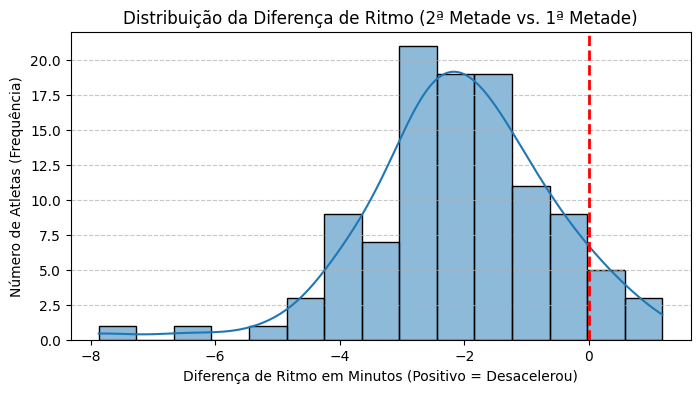

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=comparativo_splits_flat, x="Diferenca_Media_Seg_Menos_Pri", kde=True, bins=15
)

# Adiciona uma linha vertical em x=0 para ser nossa refer√™ncia
# √Ä esquerda da linha: atletas que aceleraram (split negativo)
# √Ä direita da linha: atletas que desaceleraram (split positivo)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)

plt.title("Distribui√ß√£o da Diferen√ßa de Ritmo (2¬™ Metade vs. 1¬™ Metade)")
plt.xlabel("Diferen√ßa de Ritmo em Minutos (Positivo = Desacelerou)")
plt.ylabel("N√∫mero de Atletas (Frequ√™ncia)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A an√°lise da distribui√ß√£o da diferen√ßa de ritmo entre a primeira e a segunda metade da prova (gr√°fico de histograma) revelou um insight fundamental sobre a natureza da competi√ß√£o. Observou-se que a grande maioria dos atletas concluintes apresentou um "split negativo", ou seja, um ritmo m√©dio mais r√°pido na segunda metade do percurso.

Este padr√£o, evidenciado pelo pico da distribui√ß√£o em valores negativos (-2 a -3 min/km), n√£o deve ser interpretado primariamente como uma escolha estrat√©gica deliberada dos atletas. A causa raiz mais prov√°vel √© o perfil altim√©trico do percurso, com uma concentra√ß√£o de subidas e maior dificuldade na primeira metade.

Dessa forma, a vari√°vel Diferenca_Seg_Menos_Pri transcende a simples no√ß√£o de estrat√©gia e se torna um √≠ndice de gest√£o de prova e de efici√™ncia do atleta. Ela quantifica a capacidade de cada indiv√≠duo de administrar seu esfor√ßo na se√ß√£o mais exigente para, ent√£o, capitalizar no trecho teoricamente mais favor√°vel. Uma diferen√ßa mais negativa pode indicar uma gest√£o de energia superior. Portanto, esta vari√°vel √© considerada relevante e ser√° incorporada em an√°lises subsequentes para investigar sua correla√ß√£o com o desempenho geral e outras m√©tricas dos atletas.

In [23]:
# Vamos unir as duas tabelas
df_final_completo = pd.merge(
    left=df_agregado_por_atleta,  # A tabela principal, da esquerda
    right=comparativo_splits_flat,  # A tabela com os splits, da direita
    left_on="Nome Atleta",  # A chave na tabela da esquerda √© a COLUNA 'Nome Atleta'
    right_index=True,  # A chave na tabela da direita √© o √çNDICE (que tamb√©m √© o nome do atleta)
    how="left",  # 'how=left' garante que todos os atletas da tabela principal sejam mantidos
)

df_final_completo.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023   
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022   
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022   

   Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  \
0            21774       604.833333               290.291331   
1            31986       888.500000               417.596832   
2            33826       939.611111               669.719569   
3            18496       513.777778               261.647539   
4            14626       417.885714               195.390826   

   Total_Desnivel_Positivo  Total_Desnivel_negativo  ...  \
0                   2787.0                  -2790.0  ...   
1                   2787.0                  -2790.0  ...   
2                   2787.0                  -2790.0  ...   
3                   2787.0                  -2790.0  ...   
4                   2779.0                  -2781.0  ...   

   Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  \
0                   667.777778                  541.888889   
1                   942.944444                  834.055556   
2                   945.388889                  933.833333   
3                   598.944444                  428.611111   
4                   467.722222                  365.117647   

   Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  \
0                        12020                        9754   
1                        16973                       15013   
2                        17017                       16809   
3                        10781                        7715   
4                         8419                        6207   

   Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  \
0                            11.13                            9.03   
1                            15.72                           13.90   
2                            15.76                           15.56   
3                             9.98                            7.14   
4                             7.80                            6.09   

   Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  \
0                           200.33                          162.57   
1                           282.88                          250.22   
2                           283.62                          280.15   
3                           179.68                          128.58   
4                           140.32                          103.45   

   Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  
0                          -2.10                         -37.76  
1                          -1.82                         -32.66  
2                          -0.20                          -3.47  
3                          -2.84                         -51.10  
4                          -1.71                         -36.87  

[5 rows x 23 columns]

In [ ]:
df_final_completo.to_csv("Dados/df_agregado_por_atleta.csv", sep=";")

##### Analise tempo de prova x Diferen√ßa entre primeira e segunda parte da prova.

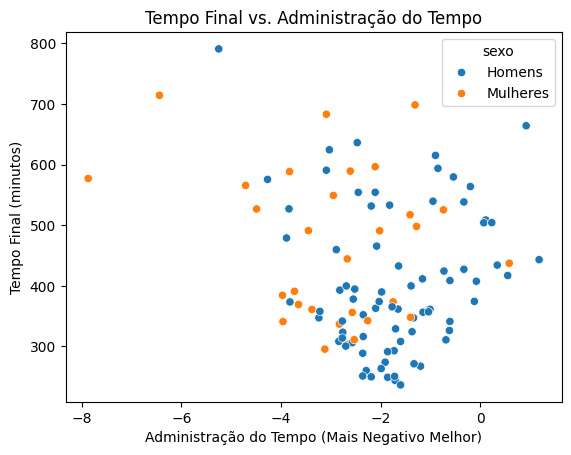

In [25]:
sns.scatterplot(
    data=df_final_completo,
    x="Diferenca_Media_Seg_Menos_Pri",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Administra√ß√£o do Tempo")
plt.xlabel("Administra√ß√£o do Tempo (Mais Negativo Melhor)")
plt.ylabel("Tempo Final (minutos)")
plt.show()

A vari√°vel "Administra√ß√£o do Tempo" n√£o tem uma correla√ß√£o linear simples com o tempo final, mas ela atua como um fator qualificador ou limitante para o alto desempenho.

- Necess√°rio, mas n√£o Suficiente: Para conseguir um tempo final de elite nesta prova, √© necess√°rio que o atleta execute a prova dentro de uma faixa √≥tima de gest√£o de ritmo (neste caso, entre -4 e -1 min/km de diferen√ßa). Estar nessa faixa n√£o garante um bom tempo (voc√™ ainda precisa ser um atleta r√°pido), mas estar fora dela praticamente garantiza que voc√™ n√£o ter√° um tempo de elite.

- Indicador de Quebra: Valores muito negativos (<-5) ou positivos (>0) n√£o s√£o indicativos de uma "estrat√©gia diferente", mas sim de uma prov√°vel quebra de ritmo. O atleta com split de -7 provavelmente caminhou muito na primeira metade (gastando tempo) e por isso teve uma grande margem para "acelerar" na segunda. O atleta com split positivo provavelmente se esgotou completamente nas subidas e n√£o conseguiu se recuperar.

### Criando fator de "Quebra"

- Vimos que a Diferenca_Seg_Menos_Pri √© √∫til, mas uma queda de 60 segundos no ritmo √© muito mais significativa para um atleta de elite (que corre a 300 seg/km) do que para um iniciante (que corre a 900 seg/km). Normalizar essa diferen√ßa pelo ritmo do pr√≥prio atleta nos d√° uma medida relativa do cansa√ßo.

In [ ]:
df_final_completo["fator_quebra"] = (
    (
        df_final_completo["Ritmo_Medio_Segunda_Metade"]
        - df_final_completo["Ritmo_Medio_Primeira_Metade"]
    )
    / df_final_completo["Ritmo_Medio_Primeira_Metade"]
).round(2)
df_final_completo.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  Total_Desnivel_Positivo  Total_Desnivel_negativo  Tempo_Final_min  Ritmo_Medio_min  Variabilidade_Ritmo_min_std  Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  fator_quebra
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022            21774       604.833333               290.291331                   2787.0                  -2790.0       362.900000        10.080556                     4.838189                   667.777778                  541.888889                        12020                        9754                            11.13                            9.03                           200.33                          162.57                          -2.10                         -37.76         -0.19
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022            31986       888.500000               417.596832                   2787.0                  -2790.0       533.100000        14.808333                     6.959947                   942.944444                  834.055556                        16973                       15013                            15.72                           13.90                           282.88                          250.22                          -1.82                         -32.66         -0.12
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023            33826       939.611111               669.719569                   2787.0                  -2790.0       563.766667        15.660185                    11.161993                   945.388889                  933.833333                        17017                       16809                            15.76                           15.56                           283.62                          280.15                          -0.20                          -3.47         -0.01
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022            18496       513.777778               261.647539                   2787.0                  -2790.0       308.266667         8.562963                     4.360792                   598.944444                  428.611111                        10781                        7715                             9.98                            7.14                           179.68                          128.58                          -2.84                         -51.10         -0.28
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022            14626       417.885714               195.390826                   2779.0                  -2781.0       243.766667         6.964762                     3.256514                   467.722222                  365.117647                         8419                        6207                             7.80                            6.09                           140.32                          103.45                          -1.71                         -36.87         -0.22

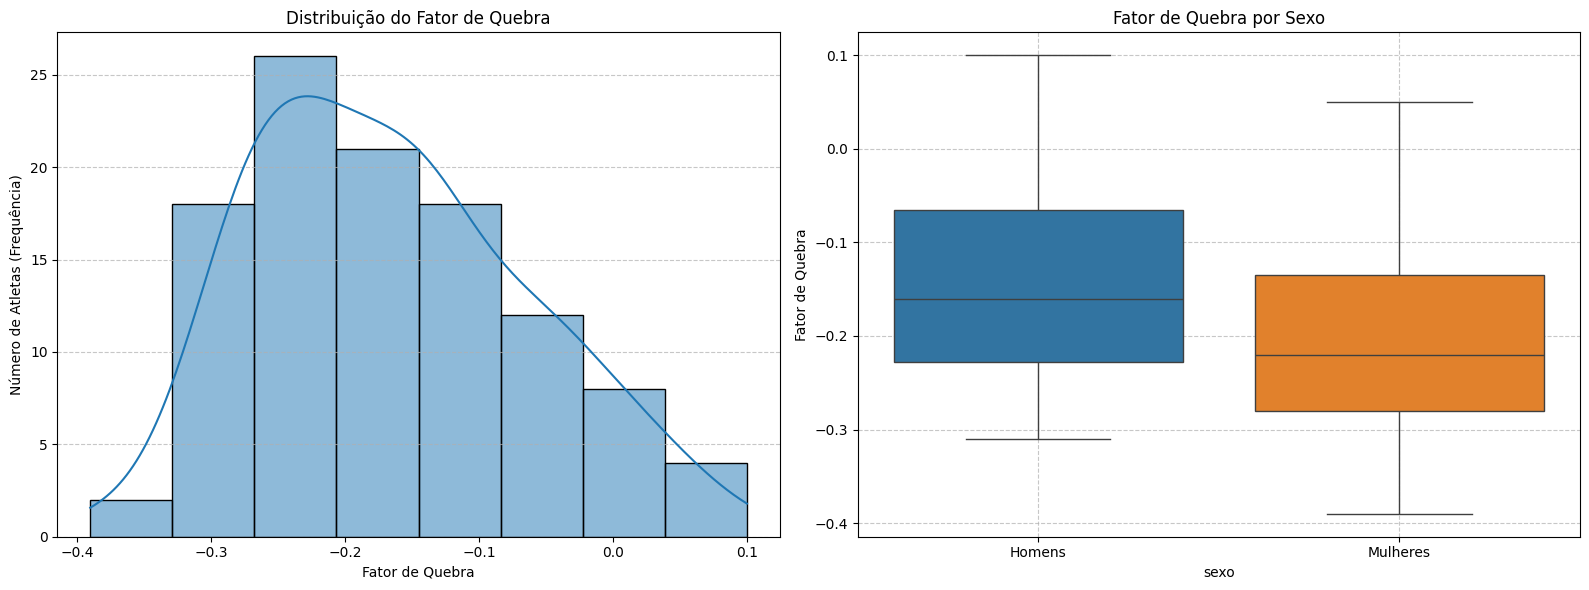

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(
    data=df_final_completo,
    x="fator_quebra",
    kde=True,
    ax=axes[0],  # Direciona o plot para o primeiro eixo
)
axes[0].set_title("Distribui√ß√£o do Fator de Quebra")
axes[0].set_xlabel("Fator de Quebra")  # Adicionando r√≥tulo ao eixo x
axes[0].set_ylabel("N√∫mero de Atletas (Frequ√™ncia)")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)


sns.boxplot(
    data=df_final_completo,
    x="sexo",
    y="fator_quebra",
    hue="sexo",
    ax=axes[1],  # Direciona o plot para o segundo eixo
)
axes[1].set_title("Fator de Quebra por Sexo")
axes[1].set_ylabel("Fator de Quebra")
axes[1].grid(linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()

In [ ]:
df_final_completo["fator_quebra"].describe().round(2)

count    109.00
mean      -0.17
std        0.10
min       -0.39
25%       -0.25
50%       -0.17
75%       -0.09
max        0.10
Name: fator_quebra, dtype: float64

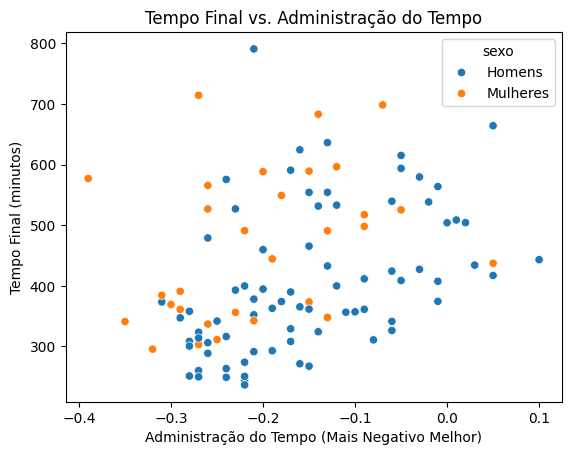

In [60]:
sns.scatterplot(
    data=df_final_completo,
    x="fator_quebra",
    y="Tempo_Final_min",
    hue="sexo",
)
plt.title("Tempo Final vs. Administra√ß√£o do Tempo")
plt.xlabel("Administra√ß√£o do Tempo (Mais Negativo Melhor)")
plt.ylabel("Tempo Final (minutos)")
plt.show()

##### Analise distribui√ß√£o partes das provas

##### Dividindo em 2

In [26]:
df_final_completo.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023   
3          Alex Junior Aj  Homens      20 a 24  65 a 74 kg         2022   
4      Alexandre Santiago  Homens      35 a 44  55 a 64 kg         2022   

   Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  \
0            21774       604.833333               290.291331   
1            31986       888.500000               417.596832   
2            33826       939.611111               669.719569   
3            18496       513.777778               261.647539   
4            14626       417.885714               195.390826   

   Total_Desnivel_Positivo  Total_Desnivel_negativo  ...  \
0                   2787.0                  -2790.0  ...   
1                   2787.0                  -2790.0  ...   
2                   2787.0                  -2790.0  ...   
3                   2787.0                  -2790.0  ...   
4                   2779.0                  -2781.0  ...   

   Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  \
0                   667.777778                  541.888889   
1                   942.944444                  834.055556   
2                   945.388889                  933.833333   
3                   598.944444                  428.611111   
4                   467.722222                  365.117647   

   Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  \
0                        12020                        9754   
1                        16973                       15013   
2                        17017                       16809   
3                        10781                        7715   
4                         8419                        6207   

   Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  \
0                            11.13                            9.03   
1                            15.72                           13.90   
2                            15.76                           15.56   
3                             9.98                            7.14   
4                             7.80                            6.09   

   Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  \
0                           200.33                          162.57   
1                           282.88                          250.22   
2                           283.62                          280.15   
3                           179.68                          128.58   
4                           140.32                          103.45   

   Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  
0                          -2.10                         -37.76  
1                          -1.82                         -32.66  
2                          -0.20                          -3.47  
3                          -2.84                         -51.10  
4                          -1.71                         -36.87  

[5 rows x 23 columns]

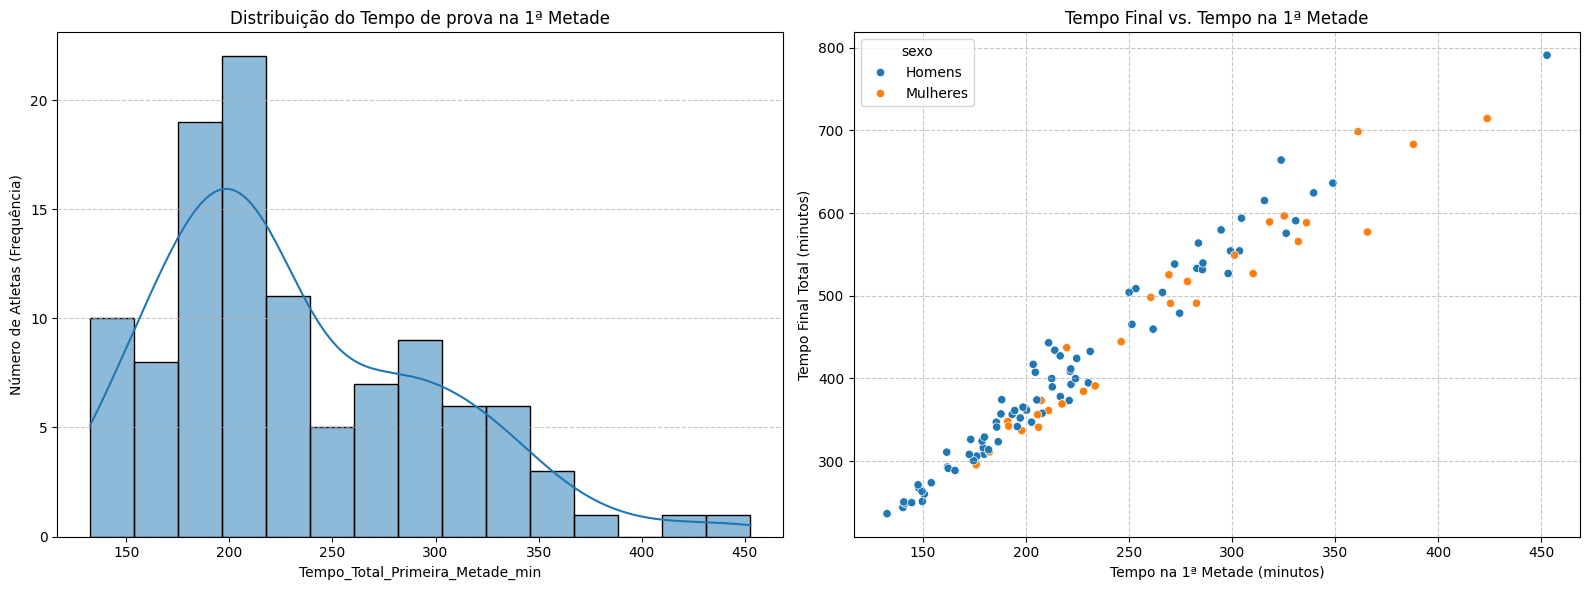

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(
    data=df_final_completo,
    x="Tempo_Total_Primeira_Metade_min",
    kde=True,
    bins=15,
    ax=axes[0],  # Direciona o plot para o primeiro eixo
)
axes[0].set_title("Distribui√ß√£o do Tempo de prova na 1¬™ Metade")
axes[0].set_ylabel("N√∫mero de Atletas (Frequ√™ncia)")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.scatterplot(
    data=df_final_completo,
    x="Tempo_Total_Primeira_Metade_min",
    y="Tempo_Final_min",
    hue="sexo",
    ax=axes[1],  # Direciona o plot para o segundo eixo
)
axes[1].set_title("Tempo Final vs. Tempo na 1¬™ Metade")
axes[1].set_xlabel("Tempo na 1¬™ Metade (minutos)")
axes[1].set_ylabel("Tempo Final Total (minutos)")
axes[1].grid(linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

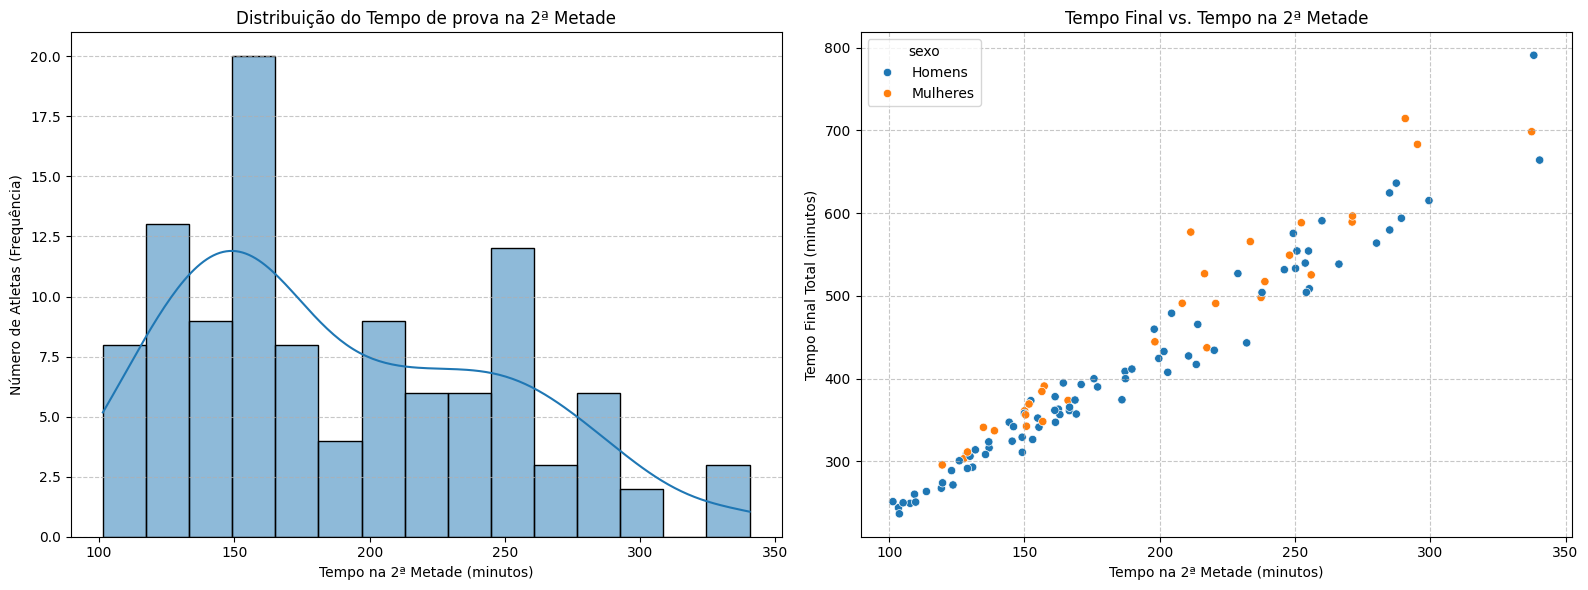

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(
    data=df_final_completo,
    x="Tempo_Total_Segunda_Metade_min",
    kde=True,
    bins=15,
    ax=axes[0],  # Direciona o plot para o primeiro eixo
)
axes[0].set_title("Distribui√ß√£o do Tempo de prova na 2¬™ Metade")
axes[0].set_xlabel("Tempo na 2¬™ Metade (minutos)")  # Adicionando r√≥tulo ao eixo x
axes[0].set_ylabel("N√∫mero de Atletas (Frequ√™ncia)")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)


sns.scatterplot(
    data=df_final_completo,
    x="Tempo_Total_Segunda_Metade_min",
    y="Tempo_Final_min",
    hue="sexo",
    ax=axes[1],  # Direciona o plot para o segundo eixo
)
axes[1].set_title("Tempo Final vs. Tempo na 2¬™ Metade")
axes[1].set_xlabel("Tempo na 2¬™ Metade (minutos)")
axes[1].set_ylabel("Tempo Final Total (minutos)")
axes[1].grid(linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()

##### Dividindo em Partes de 5 em 5km

In [ ]:
df_segmentado = df_completo.copy()
df_segmentado["Trecho_5km"] = df_segmentado["km_prova"].apply(
    lambda km: f"Trecho {int((km - 1) // 5) * 5}-{int((km - 1) // 5) * 5 + 5} km"
)
df_segmentado.head()

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo     Trecho_5km
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0               285             2023               13.0               -9.0  Trecho 0-5 km
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0               298             2023               88.0                0.0  Trecho 0-5 km
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0               295             2023               58.0                0.0  Trecho 0-5 km
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0               363             2023               46.0              -81.0  Trecho 0-5 km
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0               357             2023               41.0              -58.0  Trecho 0-5 km

In [ ]:
estatisticas_describe = ["mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_segmentado.groupby("Trecho_5km")
    .agg(
        {
            "tempo_por_km_seg": estatisticas_describe,
            "desnivel_positivo": estatisticas_describe,
            "desnivel_negativo": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Parte da Prova ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Parte da Prova ---
                                      mean     std    min  median     max
Trecho_5km                                                               
Trecho 0-5 km   desnivel_negativo   -29.60   33.57  -81.0    -9.0     0.0
                desnivel_positivo    49.20   24.40   13.0    46.0    88.0
                tempo_por_km_seg    479.35  196.66  262.0   439.0  1908.0
Trecho 10-15 km desnivel_negativo   -19.40   12.38  -37.0   -18.0     0.0
                desnivel_positivo    94.60   50.56   50.0    79.0   193.0
                tempo_por_km_seg    683.62  341.78  295.0   597.0  2988.0
Trecho 15-20 km desnivel_negativo   -85.80  122.40 -329.0   -30.0    -2.0
                desnivel_positivo   199.20  118.72   15.0   167.0   354.0
                tempo_por_km_seg   1350.08  800.02  246.0  1175.0  4463.0
Trecho 20-25 km desnivel_negativo   -94.80   65.73 -162.0  -137.0   -13.0
                desnivel_positivo    90.60  105.06    6

C:\Users\Home\AppData\Local\Temp\ipykernel_22284\126415862.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


- O Trecho Mais Dif√≠cil (15-20 km): Este √©, sem d√∫vida, o "cora√ß√£o" da prova e o trecho mais brutal. Possui a maior m√©dia de ganho de eleva√ß√£o (mean 199.20m por km) e, consequentemente, o tempo m√©dio mais lento de todos (mean 1350s, ou 22min30s por km). √â o divisor de √°guas da corrida.

- A Subida Progressiva (0-15 km): A dificuldade da prova aumenta gradualmente at√© o pico. O ritmo fica progressivamente mais lento do trecho 0-5 km ao 10-15 km, √† medida que a altimetria m√©dia aumenta.

- A Grande Descida (25-30 km): Ap√≥s o trecho mais dif√≠cil, esta √© a principal se√ß√£o de descida da prova (mean de -179.40m por km). O ganho de eleva√ß√£o √© m√≠nimo (mean 8.60m) e o ritmo volta a ser r√°pido (mean 554s).

- O Sprint Final (35-40 km): O final da prova √© extremamente r√°pido. Com pouqu√≠ssima varia√ß√£o de terreno, este √© de longe o trecho com o menor tempo m√©dio (mean 260s, ou 4min20s por km).

Em resumo: A prova concentra sua maior dificuldade em um bloco de subida brutal entre os quil√¥metros 15 e 20, seguido por uma longa se√ß√£o de descida e um final muito veloz e plano.

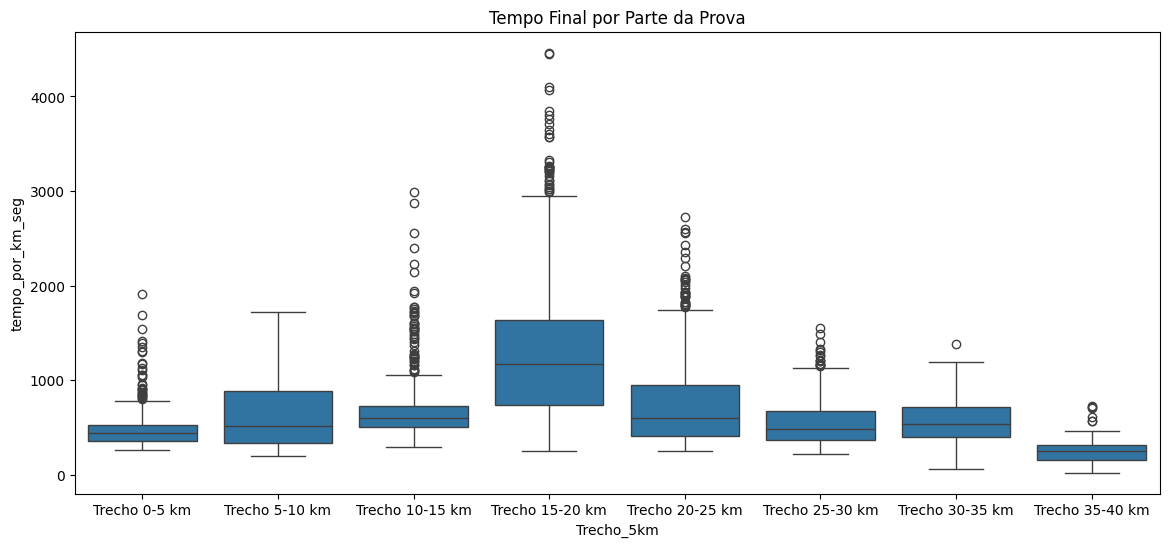

In [72]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_segmentado, x="Trecho_5km", y="tempo_por_km_seg")
plt.title("Tempo Final por Parte da Prova")
plt.show()

In [73]:
ritmo_por_5km = df_segmentado.groupby(["Nome Atleta", "Trecho_5km"]).agg(
    tempo_por_km_seg=("tempo_por_km_seg", "mean"),
    tempo_total=("tempo_por_km_seg", "sum"),
)
comparativo_splits = ritmo_por_5km.unstack()
multi_level_columns = comparativo_splits.columns
novos_nomes_colunas = [
    f"Ritmo_Medio_{metade.replace(' ', '_')}"
    if metrica == "tempo_por_km_seg"
    else f"Tempo_Total_{metade.replace(' ', '_')}"
    for metrica, metade in multi_level_columns
]

# 3. Atribua os novos nomes ao seu DataFrame
comparativo_splits_flat = comparativo_splits.copy()  # Copia para n√£o alterar o original
comparativo_splits_flat.columns = novos_nomes_colunas

colunas_em_segundos = novos_nomes_colunas

for coluna in colunas_em_segundos:
    # 3. Defina o nome da nova coluna, adicionando '_min' ao final
    nova_coluna_min = coluna + "_min"

    # 4. Crie a nova coluna, fazendo a convers√£o (dividir por 60) e arredondando (round(2))
    comparativo_splits_flat[nova_coluna_min] = (
        comparativo_splits_flat[coluna] / 60
    ).round(2)


df_split_5km = comparativo_splits_flat.reset_index()
df_split_5km.head(5)

Nome Atleta  Ritmo_Medio_Trecho_0-5_km  Ritmo_Medio_Trecho_10-15_km  Ritmo_Medio_Trecho_15-20_km  Ritmo_Medio_Trecho_20-25_km  Ritmo_Medio_Trecho_25-30_km  Ritmo_Medio_Trecho_30-35_km  Ritmo_Medio_Trecho_35-40_km  Ritmo_Medio_Trecho_5-10_km  Tempo_Total_Trecho_0-5_km  Tempo_Total_Trecho_10-15_km  Tempo_Total_Trecho_15-20_km  Tempo_Total_Trecho_20-25_km  Tempo_Total_Trecho_25-30_km  Tempo_Total_Trecho_30-35_km  Tempo_Total_Trecho_35-40_km  Tempo_Total_Trecho_5-10_km  Ritmo_Medio_Trecho_0-5_km_min  Ritmo_Medio_Trecho_10-15_km_min  Ritmo_Medio_Trecho_15-20_km_min  Ritmo_Medio_Trecho_20-25_km_min  Ritmo_Medio_Trecho_25-30_km_min  Ritmo_Medio_Trecho_30-35_km_min  Ritmo_Medio_Trecho_35-40_km_min  Ritmo_Medio_Trecho_5-10_km_min  Tempo_Total_Trecho_0-5_km_min  Tempo_Total_Trecho_10-15_km_min  Tempo_Total_Trecho_15-20_km_min  Tempo_Total_Trecho_20-25_km_min  Tempo_Total_Trecho_25-30_km_min  Tempo_Total_Trecho_30-35_km_min  Tempo_Total_Trecho_35-40_km_min  \
0       ALFREDO GUIMARAES                      419.0                        634.8                        983.0                        495.4                        539.8                        611.4                        357.0                       600.0                     2095.0                       3174.0                       4915.0                       2477.0                       2699.0                       3057.0                        357.0                      3000.0                           6.98                            10.58                            16.38                             8.26                             9.00                            10.19                             5.95                           10.00                          34.92                            52.90                            81.92                            41.28                            44.98                            50.95                             5.95   
1             Albert Melo                      599.8                        825.4                       1442.8                        737.4                        825.0                        927.8                        701.0                       898.8                     2999.0                       4127.0                       7214.0                       3687.0                       4125.0                       4639.0                        701.0                      4494.0                          10.00                            13.76                            24.05                            12.29                            13.75                            15.46                            11.68                           14.98                          49.98                            68.78                           120.23                            61.45                            68.75                            77.32                            11.68   
2  Alessandro Sousa(all√™)                      508.2                        748.0                       2026.4                       1284.6                        717.6                        732.0                        271.0                       694.2                     2541.0                       3740.0                      10132.0                       6423.0                       3588.0                       3660.0                        271.0                      3471.0                           8.47                            12.47                            33.77                            21.41                            11.96                            12.20                             4.52                           11.57                          42.35                            62.33                           168.87                           107.05                            59.80                            61.00                             4.52   
3          Alex Junior Aj                      366.2                        568.6                        

In [75]:
# Vamos unir as duas tabelas
df_final_completo_split_5km = pd.merge(
    left=df_final_completo,  # A tabela principal, da esquerda
    right=df_split_5km,  # A tabela com os splits, da direita
    on="Nome Atleta",  # A chave na tabela da esquerda √© a COLUNA 'Nome Atleta'
    how="left",  # 'how=left' garante que todos os atletas da tabela principal sejam mantidos
)

df_final_completo_split_5km.head()

Nome Atleta    sexo faixa_etaria        peso  ano_corrida  Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  Total_Desnivel_Positivo  Total_Desnivel_negativo  Tempo_Final_min  Ritmo_Medio_min  Variabilidade_Ritmo_min_std  Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  fator_quebra  Ritmo_Medio_Trecho_0-5_km  Ritmo_Medio_Trecho_10-15_km  Ritmo_Medio_Trecho_15-20_km  Ritmo_Medio_Trecho_20-25_km  Ritmo_Medio_Trecho_25-30_km  Ritmo_Medio_Trecho_30-35_km  Ritmo_Medio_Trecho_35-40_km  Ritmo_Medio_Trecho_5-10_km  Tempo_Total_Trecho_0-5_km  Tempo_Total_Trecho_10-15_km  Tempo_Total_Trecho_15-20_km  Tempo_Total_Trecho_20-25_km  Tempo_Total_Trecho_25-30_km  Tempo_Total_Trecho_30-35_km  Tempo_Total_Trecho_35-40_km  \
0       ALFREDO GUIMARAES  Homens      45 a 54  75 a 84 kg         2022            21774       604.833333               290.291331                   2787.0                  -2790.0       362.900000        10.080556                     4.838189                   667.777778                  541.888889                        12020                        9754                            11.13                            9.03                           200.33                          162.57                          -2.10                         -37.76         -0.19                      419.0                        634.8                        983.0                        495.4                        539.8                        611.4                        357.0                       600.0                     2095.0                       3174.0                       4915.0                       2477.0                       2699.0                       3057.0                        357.0   
1             Albert Melo  Homens      25 a 34  75 a 84 kg         2022            31986       888.500000               417.596832                   2787.0                  -2790.0       533.100000        14.808333                     6.959947                   942.944444                  834.055556                        16973                       15013                            15.72                           13.90                           282.88                          250.22                          -1.82                         -32.66         -0.12                      599.8                        825.4                       1442.8                        737.4                        825.0                        927.8                        701.0                       898.8                     2999.0                       4127.0                       7214.0                       3687.0                       4125.0                       4639.0                        701.0   
2  Alessandro Sousa(all√™)  Homens      45 a 54  65 a 74 kg         2023            33826       939.611111               669.719569                   2787.0                  -2790.0       563.766667        15.660185                    11.161993                   945.388889                  933.833333                        17017                       16809                            15.76                           15.56                           283.62                          280.15                          -0.20                          -3.47         -0.01                      508.2                        748.0                       2026.4                       1284.6                        717.6                        732.0                        271.0                       694.2                     2541.0                       3740.0                      10132.0                       6423.0                       3588.0                       3660.0                        271.0   
3          Alex Junior Aj

### An√°lise Subida vs Descida

In [ ]:
df_sobe_desc = df_completo.copy()
df_sobe_desc["Diff_Sob_Desc"] = (
    df_sobe_desc["desnivel_positivo"] + df_sobe_desc["desnivel_negativo"]
)
df_sobe_desc["percent_inclin_subida"] = df_sobe_desc["desnivel_positivo"] / 1000 * 100
df_sobe_desc["percent_inclin_descida"] = df_sobe_desc["desnivel_negativo"] / 1000 * 100
df_sobe_desc["perc_diff"] = (
    df_sobe_desc["desnivel_positivo"] / abs(df_sobe_desc["desnivel_negativo"]) - 1
)
df_sobe_desc.head()

Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   

   Diff_Sob_Desc  percent_inclin_subida  percent_inclin_descida  perc_diff  
0            4.0                    1.3                    -0.9   0.444444  
1           88.0                    8.8                     0.0        inf  
2           58.0                    5.8                     0.0        inf  
3          -35.0                    4.6                    -8.1  -0.432099  
4          -17.0                    4.1                    -5.8  -0.293103

In [ ]:
def Sob_Desc(diff, desnivel_positivo_km, desnivel_negativo_km):
    if desnivel_positivo_km < 20 and desnivel_negativo_km > -20:
        return "PLANO"
    elif diff >= -0.5 and diff <= 0.5:
        return "MISTO"
    elif diff < -0.5:
        return "DESCIDA"
    else:
        return "SUBIDA"


# Aplicando a fun√ß√£o ao DataFrame
df_sobe_desc["Sob_Desc"] = df_sobe_desc[
    ["perc_diff", "desnivel_positivo", "desnivel_negativo"]
].apply(lambda x: Sob_Desc(x[0], x[1], x[2]), axis=1)
df_sobe_desc.head(10)

C:\Users\Home\AppData\Local\Temp\ipykernel_22284\2418822712.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_sobe_desc["Sob_Desc"] = df_sobe_desc[["perc_diff", "desnivel_positivo", "desnivel_negativo"]].apply(lambda x: Sob_Desc(x[0], x[1], x[2]), axis=1)


Nome Atleta    sexo faixa_etaria           peso   ano  km_prova  \
0  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       1.0   
1  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       2.0   
2  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       3.0   
3  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       4.0   
4  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       5.0   
5  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       6.0   
6  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       7.0   
7  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       8.0   
8  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023       9.0   
9  Andr√© Mapa  Homens      35 a 44  N√£o informado  2023      10.0   

   tempo_por_km_seg  ano_mais_antigo  desnivel_positivo  desnivel_negativo  \
0               285             2023               13.0               -9.0   
1               298             2023               88.0                0.0   
2               295             2023               58.0                0.0   
3               363             2023               46.0              -81.0   
4               357             2023               41.0              -58.0   
5               670             2023              128.0              -11.0   
6               258             2023              228.0               -7.0   
7               211             2023                1.0             -243.0   
8               338             2023                1.0             -122.0   
9               544             2023                9.0              -69.0   

   Diff_Sob_Desc  percent_inclin_subida  percent_inclin_descida  perc_diff  \
0            4.0                    1.3                    -0.9   0.444444   
1           88.0                    8.8                     0.0        inf   
2           58.0                    5.8                     0.0        inf   
3          -35.0                    4.6                    -8.1  -0.432099   
4          -17.0                    4.1                    -5.8  -0.293103   
5          117.0                   12.8                    -1.1  10.636364   
6          221.0                   22.8                    -0.7  31.571429   
7         -242.0                    0.1                   -24.3  -0.995885   
8         -121.0                    0.1                   -12.2  -0.991803   
9          -60.0                    0.9                    -6.9  -0.869565   

  Sob_Desc  
0    PLANO  
1   SUBIDA  
2   SUBIDA  
3    MISTO  
4    MISTO  
5   SUBIDA  
6   SUBIDA  
7  DESCIDA  
8  DESCIDA  
9  DESCIDA

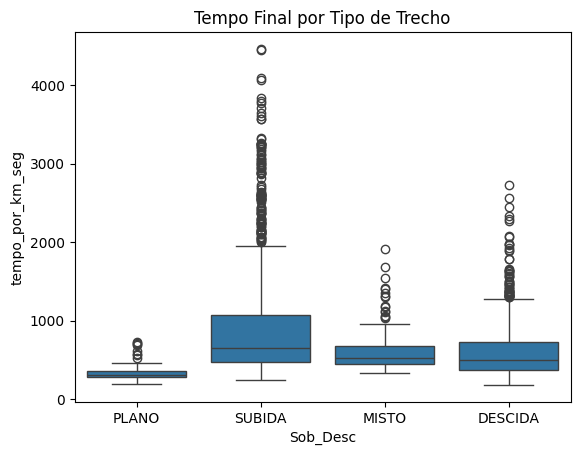

In [ ]:
sns.boxplot(
    data=df_sobe_desc[df_sobe_desc["tempo_por_km_seg"] > 180],
    x="Sob_Desc",
    y="tempo_por_km_seg",
)
plt.title("Tempo Final por Tipo de Trecho")
plt.show()

- PLANO

Ritmo mais r√°pido de todos os trechos.

Maior consist√™ncia: Quase todos os atletas correm em um ritmo parecido.

- SUBIDA

Ritmo mais lento de forma disparada.

Maior varia√ß√£o de performance: √â o trecho que mais diferencia os atletas. Onde a prova √© "ganha" ou "perdida".

- MISTO

Ritmo intermedi√°rio, mais r√°pido que as subidas.

Quebra de ritmo: Terreno ondulado que exige varia√ß√£o constante de esfor√ßo.

- DESCIDA

Ritmo mais r√°pido que subidas, mas mais lento que o plano.

Exige t√©cnica: A varia√ß√£o nos tempos mostra que a dificuldade do terreno e a habilidade do atleta s√£o cruciais.

In [ ]:
estatisticas_describe = ["mean", "std", "min", "median", "max"]

# 2. Crie o dicion√°rio de agrega√ß√£o, passando a lista de estat√≠sticas para cada coluna
resumo_completo = (
    df_sobe_desc[df_sobe_desc["tempo_por_km_seg"] > 180]
    .groupby("Sob_Desc")
    .agg(
        {
            "tempo_por_km_seg": estatisticas_describe,
        }
    )
    .stack(level=0)
)

# 3. Imprima o resultado. Usar .round(2) ajuda na visualiza√ß√£o.
print("--- Resumo Estat√≠stico Detalhado por Tipo Inclina√ß√£o ---")
print(resumo_completo.round(2))

--- Resumo Estat√≠stico Detalhado por Tipo Inclina√ß√£o ---
                             mean     std  min  median   max
Sob_Desc                                                    
DESCIDA  tempo_por_km_seg  592.08  316.43  183   504.0  2722
MISTO    tempo_por_km_seg  600.45  245.19  331   529.5  1908
PLANO    tempo_por_km_seg  331.29   92.40  188   311.0   724
SUBIDA   tempo_por_km_seg  869.99  613.09  246   652.0  4463


C:\Users\Home\AppData\Local\Temp\ipykernel_22284\3682872139.py:12: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


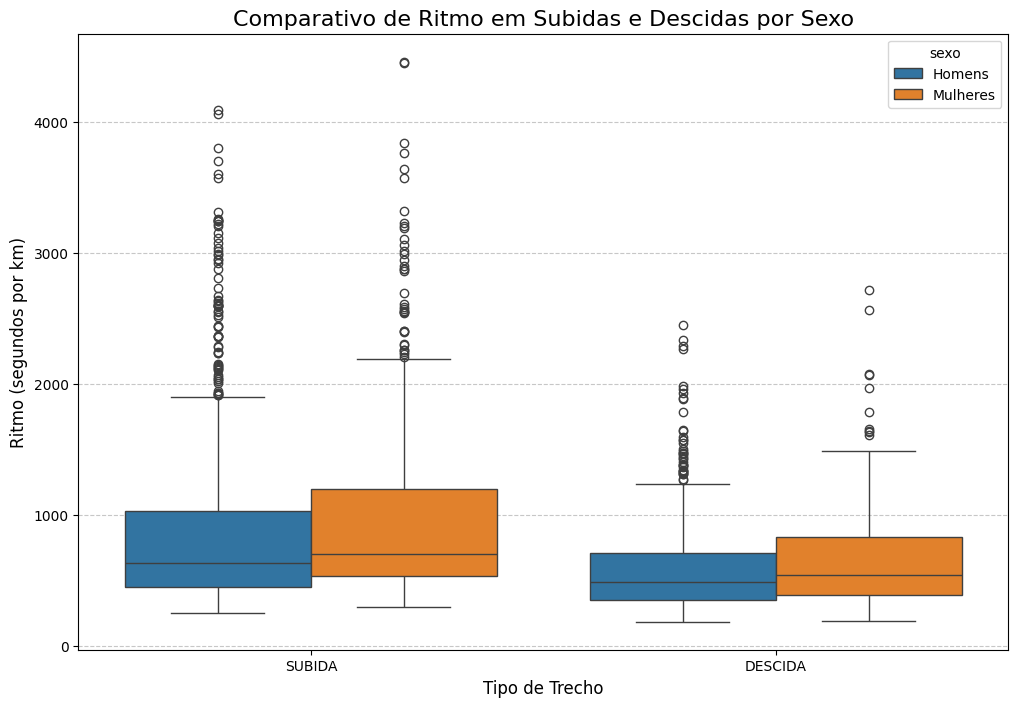

In [ ]:
categorias_desejadas = ["SUBIDA", "DESCIDA"]
df_filtrado = df_sobe_desc[
    (df_sobe_desc["Sob_Desc"].isin(categorias_desejadas))
    & (df_sobe_desc["tempo_por_km_seg"] > 180)
]

# 2. Criar o gr√°fico
plt.figure(figsize=(12, 8))  # Ajustei o tamanho para melhor visualiza√ß√£o
sns.boxplot(
    data=df_filtrado,
    x="Sob_Desc",  # No eixo X, as categorias 'SUBIDA' e 'DESCIDA'
    y="tempo_por_km_seg",  # No eixo Y, o ritmo
    hue="sexo",  # O 'hue' separa os dados por sexo
)

# Adicionar t√≠tulos e formata√ß√£o
plt.title("Comparativo de Ritmo em Subidas e Descidas por Sexo", fontsize=16)
plt.xlabel("Tipo de Trecho", fontsize=12)
plt.ylabel("Ritmo (segundos por km)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Juntando as tabelas

In [99]:
ritmo_por_nivel = df_sobe_desc.groupby(["Nome Atleta", "Sob_Desc"]).agg(
    tempo_por_km_seg=("tempo_por_km_seg", "mean"),
    tempo_total=("tempo_por_km_seg", "sum"),
)

# --- PASSO 2: Pivotar a tabela (unstack) ---
# Isso transforma as linhas de 'Sob_Desc' (PLANO, SUBIDA, etc.) em colunas.
# .fillna(0) √© importante para atletas que talvez n√£o tenham passado por um tipo de terreno.
comparativo_niveis = ritmo_por_nivel.unstack().fillna(0)


# --- PASSO 3: Achatar e renomear as colunas (mesma l√≥gica de antes) ---
multi_level_columns_nivel = comparativo_niveis.columns
# Adaptamos a l√≥gica para os n√≠veis de inclina√ß√£o
novos_nomes_colunas_nivel = [
    f"Ritmo_Medio_{nivel}" if metrica == "tempo_por_km_seg" else f"Tempo_Total_{nivel}"
    for metrica, nivel in multi_level_columns_nivel
]
comparativo_niveis.columns = novos_nomes_colunas_nivel


# --- PASSO 4: Converter as novas colunas de segundos para minutos ---
# A lista de colunas √© gerada dinamicamente
colunas_em_segundos_nivel = novos_nomes_colunas_nivel

for coluna in colunas_em_segundos_nivel:
    nova_coluna_min = coluna + "_min"
    comparativo_niveis[nova_coluna_min] = (comparativo_niveis[coluna] / 60).round(2)

comparativo_niveis = comparativo_niveis.reset_index()

In [ ]:
df_final_com_tudo = pd.merge(
    left=df_final_completo_split_5km,
    right=comparativo_niveis,
    on="Nome Atleta",
    how="left",
)

# Exibindo o resultado final
print("Tabela final com a an√°lise por n√≠vel de inclina√ß√£o:")
df_final_com_tudo.head(10)

Tabela final com a an√°lise por n√≠vel de inclina√ß√£o:


Nome Atleta      sexo faixa_etaria           peso  ano_corrida  Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  Total_Desnivel_Positivo  Total_Desnivel_negativo  Tempo_Final_min  Ritmo_Medio_min  Variabilidade_Ritmo_min_std  Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  Ritmo_Medio_Primeira_Metade_min  Ritmo_Medio_Segunda_Metade_min  Tempo_Total_Primeira_Metade_min  Tempo_Total_Segunda_Metade_min  Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  fator_quebra  Ritmo_Medio_Trecho_0-5_km  Ritmo_Medio_Trecho_10-15_km  Ritmo_Medio_Trecho_15-20_km  Ritmo_Medio_Trecho_20-25_km  Ritmo_Medio_Trecho_25-30_km  Ritmo_Medio_Trecho_30-35_km  Ritmo_Medio_Trecho_35-40_km  Ritmo_Medio_Trecho_5-10_km  Tempo_Total_Trecho_0-5_km  Tempo_Total_Trecho_10-15_km  Tempo_Total_Trecho_15-20_km  Tempo_Total_Trecho_20-25_km  Tempo_Total_Trecho_25-30_km  Tempo_Total_Trecho_30-35_km  \
0            ALFREDO GUIMARAES    Homens      45 a 54     75 a 84 kg         2022            21774       604.833333               290.291331                   2787.0                  -2790.0       362.900000        10.080556                     4.838189                   667.777778                  541.888889                        12020                        9754                            11.13                            9.03                           200.33                          162.57                          -2.10                         -37.76         -0.19                      419.0                        634.8                        983.0                        495.4                        539.8                       611.40                        357.0                       600.0                     2095.0                       3174.0                       4915.0                       2477.0                       2699.0                       3057.0   
1                  Albert Melo    Homens      25 a 34     75 a 84 kg         2022            31986       888.500000               417.596832                   2787.0                  -2790.0       533.100000        14.808333                     6.959947                   942.944444                  834.055556                        16973                       15013                            15.72                           13.90                           282.88                          250.22                          -1.82                         -32.66         -0.12                      599.8                        825.4                       1442.8                        737.4                        825.0                       927.80                        701.0                       898.8                     2999.0                       4127.0                       7214.0                       3687.0                       4125.0                       4639.0   
2       Alessandro Sousa(all√™)    Homens      45 a 54     65 a 74 kg         2023            33826       939.611111               669.719569                   2787.0                  -2790.0       563.766667        15.660185                    11.161993                   945.388889                  933.833333                        17017                       16809                            15.76                           15.56                           283.62                          280.15                          -0.20                          -3.47         -0.01                      508.2                        748.0                       2026.4                       1284.6                        717.6                       732.00                        271.0                       694.2                     2541.0                       3740.0                      10132.0                       6423.0                       3588.0                       3660.0   
3               Alex Junior Aj    Homens      20 a 24     65 a 74 kg         2022            18496       5

In [101]:
df_final_com_tudo.columns

Index(['Nome Atleta', 'sexo', 'faixa_etaria', 'peso', 'ano_corrida', 'Tempo_Final_seg', 'Ritmo_Medio_seg', 'Variabilidade_Ritmo_std', 'Total_Desnivel_Positivo', 'Total_Desnivel_negativo', 'Tempo_Final_min', 'Ritmo_Medio_min', 'Variabilidade_Ritmo_min_std', 'Ritmo_Medio_Primeira_Metade', 'Ritmo_Medio_Segunda_Metade', 'Tempo_Total_Primeira_Metade', 'Tempo_Total_Segunda_Metade', 'Ritmo_Medio_Primeira_Metade_min', 'Ritmo_Medio_Segunda_Metade_min', 'Tempo_Total_Primeira_Metade_min', 'Tempo_Total_Segunda_Metade_min', 'Diferenca_Media_Seg_Menos_Pri', 'Diferenca_total_Seg_Menos_Pri', 'fator_quebra', 'Ritmo_Medio_Trecho_0-5_km', 'Ritmo_Medio_Trecho_10-15_km', 'Ritmo_Medio_Trecho_15-20_km', 'Ritmo_Medio_Trecho_20-25_km', 'Ritmo_Medio_Trecho_25-30_km', 'Ritmo_Medio_Trecho_30-35_km', 'Ritmo_Medio_Trecho_35-40_km', 'Ritmo_Medio_Trecho_5-10_km', 'Tempo_Total_Trecho_0-5_km', 'Tempo_Total_Trecho_10-15_km', 'Tempo_Total_Trecho_15-20_km', 'Tempo_Total_Trecho_20-25_km', 'Tempo_Total_Trecho_25-30_km',
   

### Criando mais algumas vari√°veis

In [ ]:
df_selecionado = df_final_com_tudo[
    [
        "Nome Atleta",
        "sexo",
        "faixa_etaria",
        "peso",
        "Tempo_Final_seg",
        "Ritmo_Medio_seg",
        "Variabilidade_Ritmo_std",
        "Variabilidade_Ritmo_min_std",
        "Ritmo_Medio_Primeira_Metade",
        "Ritmo_Medio_Segunda_Metade",
        "Tempo_Total_Primeira_Metade",
        "Tempo_Total_Segunda_Metade",
        "Diferenca_Media_Seg_Menos_Pri",
        "Diferenca_total_Seg_Menos_Pri",
        "fator_quebra",
        "Ritmo_Medio_Trecho_0-5_km",
        "Ritmo_Medio_Trecho_10-15_km",
        "Ritmo_Medio_Trecho_15-20_km",
        "Ritmo_Medio_Trecho_20-25_km",
        "Ritmo_Medio_Trecho_25-30_km",
        "Ritmo_Medio_Trecho_30-35_km",
        "Ritmo_Medio_Trecho_35-40_km",
        "Ritmo_Medio_Trecho_5-10_km",
        "Tempo_Total_Trecho_0-5_km",
        "Tempo_Total_Trecho_5-10_km",
        "Tempo_Total_Trecho_10-15_km",
        "Tempo_Total_Trecho_15-20_km",
        "Tempo_Total_Trecho_20-25_km",
        "Tempo_Total_Trecho_25-30_km",
        "Tempo_Total_Trecho_30-35_km",
        "Tempo_Total_Trecho_35-40_km",
        "Ritmo_Medio_DESCIDA",
        "Ritmo_Medio_MISTO",
        "Ritmo_Medio_PLANO",
        "Ritmo_Medio_SUBIDA",
        "Tempo_Total_DESCIDA",
        "Tempo_Total_MISTO",
        "Tempo_Total_PLANO",
        "Tempo_Total_SUBIDA",
    ]
].copy()

df_selecionado["indice_subida"] = (
    df_selecionado["Ritmo_Medio_SUBIDA"] / df_selecionado["Ritmo_Medio_seg"] - 1
)
df_selecionado["indice_subida_vs_descida"] = (
    df_selecionado["Ritmo_Medio_SUBIDA"] / df_selecionado["Ritmo_Medio_DESCIDA"] - 1
)
df_selecionado.to_csv("Dados/df_selecionado_segundos.csv", sep=";")
df_selecionado.head(10)

Nome Atleta      sexo faixa_etaria           peso  Tempo_Final_seg  Ritmo_Medio_seg  Variabilidade_Ritmo_std  Variabilidade_Ritmo_min_std  Ritmo_Medio_Primeira_Metade  Ritmo_Medio_Segunda_Metade  Tempo_Total_Primeira_Metade  Tempo_Total_Segunda_Metade  Diferenca_Media_Seg_Menos_Pri  Diferenca_total_Seg_Menos_Pri  fator_quebra  Ritmo_Medio_Trecho_0-5_km  Ritmo_Medio_Trecho_10-15_km  Ritmo_Medio_Trecho_15-20_km  Ritmo_Medio_Trecho_20-25_km  Ritmo_Medio_Trecho_25-30_km  Ritmo_Medio_Trecho_30-35_km  Ritmo_Medio_Trecho_35-40_km  Ritmo_Medio_Trecho_5-10_km  Tempo_Total_Trecho_0-5_km  Tempo_Total_Trecho_5-10_km  Tempo_Total_Trecho_10-15_km  Tempo_Total_Trecho_15-20_km  Tempo_Total_Trecho_20-25_km  Tempo_Total_Trecho_25-30_km  Tempo_Total_Trecho_30-35_km  Tempo_Total_Trecho_35-40_km  Ritmo_Medio_DESCIDA  Ritmo_Medio_MISTO  Ritmo_Medio_PLANO  Ritmo_Medio_SUBIDA  Tempo_Total_DESCIDA  Tempo_Total_MISTO  Tempo_Total_PLANO  Tempo_Total_SUBIDA  indice_subida  \
0            ALFREDO GUIMARAES    Homens      45 a 54     75 a 84 kg            21774       604.833333               290.291331                     4.838189                   667.777778                  541.888889                        12020                        9754                          -2.10                         -37.76         -0.19                      419.0                        634.8                        983.0                        495.4                        539.8                       611.40                        357.0                       600.0                     2095.0                      3000.0                       3174.0                       4915.0                       2477.0                       2699.0                       3057.0                        357.0           522.933333              474.5              335.5          724.117647                 7844                949                671               12310       0.197218   
1                  Albert Melo    Homens      25 a 34     75 a 84 kg            31986       888.500000               417.596832                     6.959947                   942.944444                  834.055556                        16973                       15013                          -1.82                         -32.66         -0.12                      599.8                        825.4                       1442.8                        737.4                        825.0                       927.80                        701.0                       898.8                     2999.0                      4494.0                       4127.0                       7214.0                       3687.0                       4125.0                       4639.0                        701.0           789.933333              742.0              535.0         1034.294118                11849               1484               1070               17583       0.164090   
2       Alessandro Sousa(all√™)    Homens      45 a 54     65 a 74 kg            33826       939.611111               669.719569                    11.161993                   945.388889                  933.833333                        17017                       16809                          -0.20                          -3.47         -0.01                      508.2                        748.0                       2026.4                       1284.6                        717.6                       732.00                        271.0                       694.2                     2541.0                      3471.0                       3740.0                      10132.0                       6423.0                       3588.0                       3660.0                        271.0           745.266667              628.0              331.0         1219.352941                11179               1256                662               20729       0.297721   
3               Alex Junior Aj    Homens      20 a 24     65 a 74 kg            18496       51

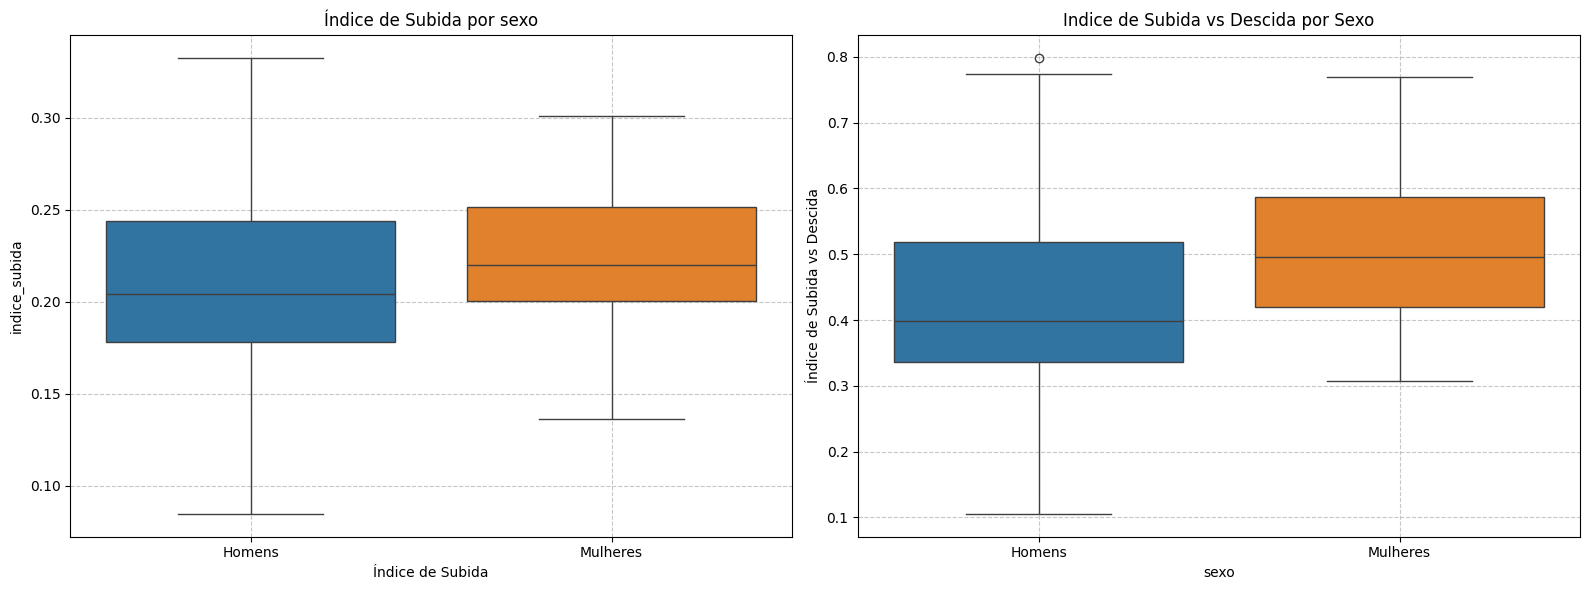

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(
    data=df_selecionado,
    x="sexo",
    y="indice_subida",
    hue="sexo",
    ax=axes[0],  # Direciona o plot para o segundo eixo
)
axes[0].set_title("√çndice de Subida por sexo")
axes[0].set_xlabel("√çndice de Subida")  # Adicionando r√≥tulo ao eixo x
axes[0].grid(linestyle="--", alpha=0.7)


sns.boxplot(
    data=df_selecionado,
    x="sexo",
    y="indice_subida_vs_descida",
    hue="sexo",
    ax=axes[1],  # Direciona o plot para o segundo eixo
)
axes[1].set_title("Indice de Subida vs Descida por Sexo")
axes[1].set_ylabel("√çndice de Subida vs Descida")
axes[1].grid(linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()

- √çndice de Subida (vs. Ritmo Geral)
Praticamente n√£o h√° diferen√ßa entre homens e mulheres neste quesito.

Conclus√£o: Ambos os grupos desaceleram de forma muito parecida nas subidas (cerca de 20-25%) em compara√ß√£o com seu pr√≥prio ritmo m√©dio. A efici√™ncia relativa em subidas √© a mesma.

- √çndice de Subida vs. Descida
Aqui h√° uma diferen√ßa clara: as mulheres apresentam um √≠ndice consistentemente mais alto.

Conclus√£o: A diferen√ßa entre o ritmo de subida e o ritmo de descida √© maior para as mulheres. Isso sugere que elas s√£o mais 'lentas' quando comparados seus tempos de subidas em rela√ß√£o ao tempo de 'descidas'